In [35]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import numpy as np

In [2]:
data = pd.read_csv("C://Users//paulo//Documents//Job Applications//Data_Tests//BFI - UChicago Gottlieb//Non-timed_task//All_years.csv")

In [3]:
data.head()

,year,cpi99,statefip,perwt,sex,age,marst,race,raced,hcovany,hinscaid,hinscare,educ,educd,inctot
0,2008,0.774,6,103,2,32,6,2,200,2,1,1,6,64,25500
1,2008,0.774,48,76,1,37,2,1,100,1,1,1,10,101,200000
2,2008,0.774,6,77,2,44,1,1,100,2,1,1,10,101,65000
3,2008,0.774,24,125,2,72,5,1,100,2,2,2,4,40,7600
4,2008,0.774,26,32,2,77,1,1,100,2,1,2,6,63,5800


In [4]:
len(data)

3429162

# Time Trends in Health Insurance Coverage

In [55]:
# These values are the percentage holding a given type of health coverage
health_cov_time = data.groupby('year').mean()[['hcovany','hinscaid','hinscare']].reset_index()
health_cov_time.loc[:, health_cov_time.columns != 'year'] = health_cov_time.loc[:, health_cov_time.columns != 'year'] - 1
health_cov_time.loc[:, health_cov_time.columns != 'year'] = health_cov_time.loc[:, health_cov_time.columns != 'year'].round(2)
health_cov_time['Year'] = health_cov_time['year']
health_cov_time['Any Health Coverage'] = health_cov_time['hcovany']
health_cov_time['Medicaid Coverage'] = health_cov_time['hinscaid']
health_cov_time['Medicare Coverage'] = health_cov_time['hinscare']
del health_cov_time['hcovany']
del health_cov_time['hinscaid']
del health_cov_time['hinscare']
del health_cov_time['year']
health_cov_time

,Year,Any Health Coverage,Medicaid Coverage,Medicare Coverage
0,2008,0.88,0.14,0.18
1,2009,0.87,0.15,0.18
2,2010,0.87,0.16,0.18
3,2011,0.86,0.18,0.19
4,2012,0.87,0.18,0.19
5,2013,0.87,0.17,0.19
6,2014,0.90,0.18,0.20
7,2015,0.92,0.19,0.21
8,2016,0.92,0.20,0.21
9,2017,0.92,0.19,0.21


In [ ]:
# The entire gain comes from 2013-2015

In [6]:
# CPI99 is a year-specific variable
data.groupby(['year','cpi99']).mean()['statefip']

year  cpi99
2008  0.774    27.640552
2009  0.777    27.635573
2010  0.764    27.632579
2011  0.741    27.635388
2012  0.726    27.669348
2013  0.715    27.637755
2014  0.704    27.654751
2015  0.703    27.653668
2016  0.694    27.659628
2017  0.679    27.649073
2018  0.663    27.685650
Name: statefip, dtype: float64

# Subgroup-Specific Time Trends

In [7]:
sex = data.groupby(['year','sex']).mean()[['hcovany','hinscaid','hinscare']].reset_index()
sex.loc[:, sex.columns != 'year'] = sex.loc[:, sex.columns != 'year'] - 1
sex.loc[:, sex.columns != 'year'] = sex.loc[:, sex.columns != 'year'].round(2)
sex['sex'] = sex['sex'] + 1
sex = sex.pivot(index='year',columns='sex')
sex

hcovany       hinscaid       hinscare      
sex        1     2        1     2        1     2
year                                            
2008    0.86  0.89     0.13  0.15     0.16  0.19
2009    0.86  0.89     0.14  0.16     0.16  0.19
2010    0.85  0.88     0.15  0.17     0.16  0.20
2011    0.85  0.88     0.17  0.19     0.17  0.21
2012    0.85  0.88     0.16  0.19     0.18  0.21
2013    0.86  0.89     0.16  0.18     0.18  0.21
2014    0.88  0.91     0.17  0.19     0.19  0.22
2015    0.90  0.93     0.18  0.20     0.19  0.22
2016    0.91  0.94     0.19  0.20     0.19  0.23
2017    0.91  0.93     0.19  0.20     0.20  0.23
2018    0.91  0.93     0.18  0.20     0.20  0.23

In [8]:
state = data.groupby(['year','statefip']).mean()[['hcovany','hinscaid','hinscare']].reset_index()
state.loc[:, state.columns != 'year'] = state.loc[:, state.columns != 'year'] - 1
state.loc[:, state.columns != 'year'] = state.loc[:, state.columns != 'year'].round(2)
state['statefip'] = state['statefip'] + 1
state = state.pivot(index='year',columns='statefip')
state

hcovany                                                        ...  \
statefip      1     2     4     5     6     8     9     10    11    12  ...   
year                                                                    ...   
2008        0.89  0.79  0.84  0.85  0.85  0.87  0.93  0.89  0.94  0.83  ...   
2009        0.88  0.80  0.84  0.86  0.84  0.87  0.92  0.92  0.95  0.83  ...   
2010        0.88  0.81  0.85  0.84  0.84  0.87  0.92  0.91  0.94  0.82  ...   
2011        0.88  0.76  0.84  0.84  0.83  0.87  0.93  0.93  0.94  0.82  ...   
2012        0.88  0.77  0.84  0.86  0.83  0.87  0.93  0.93  0.97  0.83  ...   
2013        0.88  0.77  0.83  0.87  0.84  0.88  0.93  0.90  0.94  0.83  ...   
2014        0.90  0.80  0.87  0.90  0.89  0.91  0.95  0.93  0.95  0.86  ...   
2015        0.90  0.80  0.90  0.93  0.92  0.94  0.96  0.95  0.96  0.88  ...   
2016        0.91  0.81  0.90  0.93  0.93  0.93  0.97  0.95  0.98  0.89  ...   
2017        0.91  0.85  0.90  0.93  0.93  0.93  0.96  0.96  0.97  0.89  ...   
2018        0.92  0.87  0.90  0.92  0.93  0.94  0.96  0.94  0.98  0.89  ...   

         hinscare                                                        
statefip       46    47    48    49    50    51    53    54    55    56  
year                                                                     
2008         0.21  0.19  0.14  0.11  0.22  0.16  0.16  0.24  0.18  0.19  
2009         0.18  0.19  0.15  0.11  0.22  0.17  0.15  0.24  0.18  0.18  
2010         0.23  0.20  0.15  0.12  0.18  0.17  0.16  0.23  0.18  0.18  
2011         0.21  0.21  0.17  0.13  0.21  0.18  0.18  0.25  0.19  0.17  
2012         0.21  0.22  0.17  0.13  0.20  0.18  0.19  0.26  0.21  0.18  
2013         0.23  0.21  0.17  0.13  0.24  0.18  0.19  0.25  0.21  0.16  
2014         0.22  0.22  0.17  0.13  0.25  0.18  0.20  0.27  0.21  0.19  
2015         0.22  0.22  0.18  0.12  0.26  0.19  0.20  0.26  0.22  0.22  
2016         0.23  0.23  0.17  0.14  0.24  0.20  0.20  0.27  0.23  0.18  
2017         0.22  0.23  0.18  0.15  0.23  0.19  0.21  0.25  0.24  0.18  
2018         0.21  0.23  0.18  0.14  0.23  0.20  0.21  0.28  0.22  0.19  

[11 rows x 153 columns]

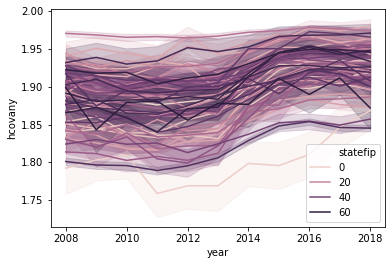

In [52]:
sns.lineplot(x='year',y='hcovany',hue='statefip', data = data);

In [58]:
marital = data.groupby(['year','marst']).mean()[['hcovany','hinscaid','hinscare']].reset_index()
marital.loc[:, marital.columns != 'year'] = marital.loc[:, marital.columns != 'year'] - 1
marital.loc[:, marital.columns != 'year'] = marital.loc[:, marital.columns != 'year'].round(2)
marital['marst'] = marital['marst'] + 1
marital = marital.rename(columns = {"hcovany": "Any Health Coverage"})
marital = marital.pivot(index='year',columns='marst')
marital

Any Health Coverage                               hinscaid              \
marst                   1     2     3     4     5     6        1     2     3   
year                                                                           
2008                 0.92  0.74  0.73  0.82  0.96  0.84     0.05  0.17  0.20   
2009                 0.91  0.73  0.73  0.81  0.96  0.84     0.06  0.18  0.22   
2010                 0.91  0.72  0.73  0.81  0.95  0.84     0.06  0.18  0.24   
2011                 0.90  0.73  0.72  0.80  0.95  0.84     0.07  0.22  0.24   
2012                 0.91  0.74  0.73  0.80  0.95  0.84     0.07  0.21  0.25   
2013                 0.91  0.76  0.74  0.82  0.95  0.85     0.07  0.19  0.25   
2014                 0.93  0.79  0.78  0.86  0.96  0.87     0.07  0.22  0.26   
2015                 0.94  0.82  0.82  0.89  0.97  0.90     0.08  0.24  0.29   
2016                 0.95  0.83  0.83  0.90  0.97  0.91     0.08  0.23  0.29   
2017                 0.95  0.85  0.84  0.90  0.97  0.90     0.08  0.24  0.30   
2018                 0.95  0.84  0.82  0.90  0.98  0.90     0.08  0.24  0.31   

                        hinscare                                
marst     4     5     6        1     2     3     4     5     6  
year                                                            
2008   0.15  0.21  0.22     0.22  0.24  0.15  0.23  0.81  0.03  
2009   0.15  0.20  0.23     0.22  0.23  0.14  0.24  0.82  0.03  
2010   0.16  0.21  0.25     0.23  0.23  0.15  0.25  0.81  0.03  
2011   0.18  0.23  0.27     0.24  0.25  0.17  0.26  0.82  0.04  
2012   0.18  0.22  0.27     0.25  0.26  0.18  0.27  0.82  0.04  
2013   0.18  0.21  0.26     0.25  0.26  0.17  0.28  0.81  0.04  
2014   0.20  0.21  0.28     0.26  0.27  0.19  0.30  0.83  0.04  
2015   0.21  0.22  0.29     0.26  0.27  0.18  0.31  0.82  0.04  
2016   0.22  0.22  0.29     0.27  0.27  0.20  0.33  0.82  0.05  
2017   0.22  0.22  0.29     0.27  0.27  0.21  0.33  0.82  0.05  
2018   0.22  0.23  0.29     0.28  0.28  0.20  0.34  0.83  0.05

In [59]:
race = data.groupby(['year','race']).mean()[['hcovany','hinscaid','hinscare']].reset_index()
race.loc[:, race.columns != 'year'] = race.loc[:, race.columns != 'year'] - 1
race.loc[:, race.columns != 'year'] = race.loc[:, race.columns != 'year'].round(2)
race['race'] = race['race'] + 1
race = race.rename(columns = {"hcovany": "Any Health Coverage"})
race = race.pivot(index='year',columns='race')
race

Any Health Coverage                                                  \
race                   1     2     3     4     5     6     7     8     9   
year                                                                       
2008                0.89  0.83  0.72  0.89  0.94  0.87  0.69  0.86  0.91   
2009                0.89  0.83  0.72  0.88  0.93  0.85  0.68  0.86  0.90   
2010                0.88  0.82  0.72  0.87  0.93  0.85  0.68  0.85  0.87   
2011                0.88  0.81  0.73  0.88  0.95  0.85  0.68  0.86  0.88   
2012                0.89  0.82  0.72  0.87  0.94  0.85  0.69  0.85  0.89   
2013                0.89  0.83  0.72  0.88  0.93  0.86  0.71  0.86  0.88   
2014                0.91  0.86  0.77  0.92  0.95  0.90  0.76  0.89  0.91   
2015                0.93  0.88  0.78  0.94  0.97  0.93  0.80  0.92  0.93   
2016                0.93  0.89  0.80  0.94  0.97  0.93  0.82  0.92  0.93   
2017                0.93  0.89  0.81  0.94  0.97  0.94  0.82  0.93  0.94   
2018                0.93  0.89  0.80  0.95  0.97  0.94  0.82  0.92  0.94   

     hinscaid  ...       hinscare                                            \
race        1  ...     9        1     2     3     4     5     6     7     8   
year           ...                                                            
2008     0.12  ...  0.22     0.19  0.15  0.12  0.11  0.25  0.09  0.06  0.08   
2009     0.12  ...  0.28     0.20  0.15  0.12  0.12  0.29  0.09  0.06  0.08   
2010     0.13  ...  0.29     0.20  0.15  0.12  0.12  0.28  0.09  0.06  0.08   
2011     0.15  ...  0.31     0.21  0.16  0.13  0.12  0.28  0.10  0.07  0.08   
2012     0.15  ...  0.27     0.21  0.17  0.13  0.12  0.27  0.10  0.07  0.09   
2013     0.14  ...  0.24     0.21  0.16  0.14  0.13  0.29  0.10  0.07  0.09   
2014     0.15  ...  0.29     0.22  0.18  0.14  0.13  0.31  0.11  0.07  0.09   
2015     0.16  ...  0.28     0.23  0.19  0.15  0.14  0.31  0.11  0.08  0.08   
2016     0.16  ...  0.28     0.23  0.19  0.15  0.15  0.34  0.12  0.08  0.09   
2017     0.16  ...  0.27     0.23  0.19  0.15  0.14  0.29  0.12  0.08  0.08   
2018     0.16  ...  0.27     0.24  0.20  0.16  0.15  0.29  0.12  0.09  0.08   

            
race     9  
year        
2008  0.05  
2009  0.08  
2010  0.08  
2011  0.07  
2012  0.07  
2013  0.08  
2014  0.07  
2015  0.06  
2016  0.07  
2017  0.09  
2018  0.07  

[11 rows x 27 columns]

In [11]:
educ = data.groupby(['year','educ']).mean()[['hcovany','hinscaid','hinscare']].reset_index()
educ.loc[:, educ.columns != 'year'] = educ.loc[:, educ.columns != 'year'] - 1
educ.loc[:, educ.columns != 'year'] = educ.loc[:, educ.columns != 'year'].round(2)
educ['educ'] = educ['educ'] + 1
educ = educ.pivot(index='year',columns='educ')
educ

hcovany                                                        ...  \
educ      0     1     2     3     4     5     6     7     8     10  ...   
year                                                                ...   
2008    0.91  0.91  0.85  0.80  0.81  0.80  0.84  0.87  0.90  0.94  ...   
2009    0.91  0.92  0.85  0.79  0.80  0.79  0.83  0.86  0.89  0.93  ...   
2010    0.91  0.92  0.85  0.80  0.81  0.78  0.82  0.85  0.88  0.93  ...   
2011    0.91  0.92  0.85  0.78  0.80  0.78  0.82  0.85  0.88  0.93  ...   
2012    0.91  0.92  0.85  0.80  0.81  0.79  0.82  0.85  0.88  0.93  ...   
2013    0.91  0.93  0.86  0.80  0.82  0.80  0.83  0.86  0.88  0.93  ...   
2014    0.92  0.94  0.88  0.83  0.85  0.83  0.86  0.88  0.91  0.95  ...   
2015    0.93  0.95  0.89  0.84  0.88  0.87  0.89  0.91  0.94  0.96  ...   
2016    0.93  0.95  0.90  0.86  0.88  0.87  0.90  0.92  0.94  0.96  ...   
2017    0.93  0.95  0.90  0.86  0.87  0.87  0.89  0.92  0.94  0.96  ...   
2018    0.93  0.95  0.90  0.86  0.88  0.87  0.89  0.92  0.94  0.96  ...   

     hinscare                                                        
educ       1     2     3     4     5     6     7     8     10    11  
year                                                                 
2008     0.03  0.16  0.17  0.22  0.19  0.26  0.17  0.13  0.14  0.19  
2009     0.03  0.16  0.17  0.21  0.19  0.27  0.18  0.13  0.15  0.18  
2010     0.03  0.15  0.17  0.20  0.18  0.27  0.18  0.14  0.15  0.20  
2011     0.04  0.16  0.17  0.21  0.19  0.28  0.18  0.15  0.16  0.21  
2012     0.03  0.15  0.17  0.22  0.18  0.28  0.19  0.16  0.17  0.22  
2013     0.03  0.14  0.16  0.20  0.18  0.29  0.19  0.17  0.17  0.23  
2014     0.03  0.14  0.17  0.21  0.18  0.30  0.20  0.18  0.18  0.24  
2015     0.03  0.14  0.16  0.21  0.18  0.30  0.21  0.19  0.19  0.25  
2016     0.03  0.13  0.16  0.20  0.18  0.30  0.22  0.20  0.19  0.26  
2017     0.03  0.13  0.16  0.19  0.17  0.30  0.23  0.20  0.20  0.26  
2018     0.03  0.12  0.15  0.19  0.18  0.31  0.24  0.22  0.21  0.27  

[11 rows x 33 columns]

In [12]:
age = data.copy()
age['age'] = (age['age']//20)*20
age = age.groupby(['year','age']).mean()[['hcovany','hinscaid','hinscare']].reset_index()
age.loc[:, age.columns != 'year'] = age.loc[:, age.columns != 'year'] - 1
age.loc[:, age.columns != 'year'] = age.loc[:, age.columns != 'year'].round(2)
age['age'] = age['age'] + 1
age = age.pivot(index='year',columns='age')
age

hcovany                        hinscaid                         hinscare  \
age       0     20    40    60   80       0     20    40    60    80       0    
year                                                                            
2008    0.91  0.77  0.87  0.96  1.0     0.26  0.09  0.07  0.12  0.20     0.01   
2009    0.91  0.76  0.86  0.96  1.0     0.29  0.10  0.08  0.11  0.20     0.01   
2010    0.91  0.74  0.85  0.96  1.0     0.31  0.11  0.09  0.12  0.20     0.01   
2011    0.92  0.74  0.84  0.96  1.0     0.34  0.13  0.10  0.13  0.23     0.01   
2012    0.92  0.75  0.84  0.95  1.0     0.34  0.12  0.10  0.13  0.22     0.01   
2013    0.92  0.76  0.84  0.96  1.0     0.33  0.12  0.10  0.12  0.21     0.01   
2014    0.93  0.80  0.88  0.97  1.0     0.35  0.14  0.12  0.13  0.20     0.01   
2015    0.95  0.84  0.90  0.97  1.0     0.35  0.16  0.13  0.13  0.20     0.01   
2016    0.95  0.86  0.90  0.97  1.0     0.35  0.16  0.13  0.14  0.20     0.01   
2017    0.95  0.86  0.90  0.97  1.0     0.34  0.16  0.13  0.14  0.21     0.01   
2018    0.95  0.86  0.90  0.97  1.0     0.34  0.16  0.13  0.14  0.21     0.01   

                              
age     20    40    60    80  
year                          
2008  0.01  0.04  0.68  0.99  
2009  0.01  0.04  0.67  0.99  
2010  0.01  0.04  0.66  0.99  
2011  0.01  0.05  0.66  0.99  
2012  0.01  0.05  0.67  0.99  
2013  0.01  0.05  0.67  0.99  
2014  0.01  0.05  0.67  0.99  
2015  0.01  0.05  0.68  0.99  
2016  0.01  0.05  0.68  0.99  
2017  0.01  0.05  0.68  0.98  
2018  0.01  0.05  0.68  0.99

In [13]:
inc = data.copy()
inc['99inc'] = inc['inctot'] * inc['cpi99']
inc['inc'] = (inc['99inc']//5e+04)*5e+04
inc.loc[inc['inc'] > 1e+05,'inc'] = 1e+05
inc = inc.groupby(['year','inc']).mean()[['hcovany','hinscaid','hinscare']].reset_index()
inc.loc[:, inc.columns != 'year'] = inc.loc[:, inc.columns != 'year'] - 1
inc.loc[:, inc.columns != 'year'] = inc.loc[:, inc.columns != 'year'].round(2)
inc['inc'] = inc['inc'] + 1
inc = inc.pivot(index='year',columns='inc')
inc

hcovany                                hinscaid                      \
inc  -50000.0   0.0       50000.0   100000.0 -50000.0   0.0       50000.0    
year                                                                         
2008      0.78      0.85      0.97      0.93      0.07      0.12      0.02   
2009      0.78      0.84      0.97      0.94      0.06      0.13      0.01   
2010      0.78      0.83      0.97      0.94      0.08      0.13      0.02   
2011      0.78      0.83      0.97      0.94      0.08      0.15      0.02   
2012      0.75      0.84      0.97      0.94      0.09      0.15      0.02   
2013      0.80      0.84      0.97      0.94      0.08      0.15      0.02   
2014      0.80      0.87      0.98      0.95      0.13      0.16      0.02   
2015      0.81      0.90      0.98      0.96      0.16      0.18      0.02   
2016      0.84      0.91      0.98      0.96      0.15      0.18      0.02   
2017      0.86      0.91      0.98      0.96      0.14      0.18      0.02   
2018      0.87      0.90      0.98      0.96      0.14      0.18      0.02   

                hinscare                                
inc   100000.0 -50000.0   0.0       50000.0   100000.0  
year                                                    
2008      0.25      0.06      0.23      0.12      0.03  
2009      0.27      0.08      0.23      0.12      0.03  
2010      0.30      0.07      0.23      0.12      0.03  
2011      0.33      0.06      0.24      0.13      0.03  
2012      0.33      0.04      0.25      0.14      0.03  
2013      0.32      0.08      0.25      0.14      0.03  
2014      0.33      0.08      0.26      0.16      0.03  
2015      0.33      0.10      0.26      0.16      0.03  
2016      0.32      0.10      0.27      0.16      0.04  
2017      0.32      0.13      0.27      0.16      0.04  
2018      0.31      0.14      0.27      0.17      0.04

# Investigation of Potential Explanations for Time Trends

**MEDICAID:**

In [43]:
data['inc99'] = data['inctot'] * data['cpi99']

In [41]:
data.head()

,year,cpi99,statefip,perwt,sex,age,marst,race,raced,hcovany,hinscaid,hinscare,educ,educd,inctot,age_grp,99inc
0,2008,0.774,6,103,2,32,6,2,200,2,1,1,6,64,25500,20,19737.0
1,2008,0.774,48,76,1,37,2,1,100,1,1,1,10,101,200000,20,154800.0
2,2008,0.774,6,77,2,44,1,1,100,2,1,1,10,101,65000,40,50310.0
3,2008,0.774,24,125,2,72,5,1,100,2,2,2,4,40,7600,60,5882.4
4,2008,0.774,26,32,2,77,1,1,100,2,1,2,6,63,5800,60,4489.2


In [45]:
len(data)

3429162

In [99]:
data.loc[data['inc99'] < 8240, 'poverty']= 1
data.loc[data['inc99'] >= 8240, 'poverty'] = 0

In [100]:
poverty = data.groupby('year').mean()['poverty'].reset_index().round(2)
poverty = poverty.rename(columns = {'year':'Year', 'poverty':'Poverty Rate'})
pov_caid = poverty.merge(health_cov_time[['Year','Medicaid Coverage']], on ='Year',how='outer')
pov_caid

,Year,Poverty Rate,Medicaid Coverage
0,2008,0.26,0.14
1,2009,0.26,0.15
2,2010,0.27,0.16
3,2011,0.30,0.18
4,2012,0.29,0.18
5,2013,0.29,0.17
6,2014,0.28,0.18
7,2015,0.27,0.19
8,2016,0.27,0.20
9,2017,0.28,0.19


In [102]:
pov_caid['norm_pov'] = pov_caid['Poverty Rate'] / pov_caid.loc[pov_caid['Year'] == 2008,'Poverty Rate'][0]
pov_caid['norm_caid'] = pov_caid['Medicaid Coverage'] / pov_caid.loc[pov_caid['Year'] == 2008,'Medicaid Coverage'][0]
pov_caid

,Year,Poverty Rate,Medicaid Coverage,norm_pov,norm_caid
0,2008,0.26,0.14,1.000000,1.000000
1,2009,0.26,0.15,1.000000,1.071429
2,2010,0.27,0.16,1.038462,1.142857
3,2011,0.30,0.18,1.153846,1.285714
4,2012,0.29,0.18,1.115385,1.285714
5,2013,0.29,0.17,1.115385,1.214286
6,2014,0.28,0.18,1.076923,1.285714
7,2015,0.27,0.19,1.038462,1.357143
8,2016,0.27,0.20,1.038462,1.428571
9,2017,0.28,0.19,1.076923,1.357143


''

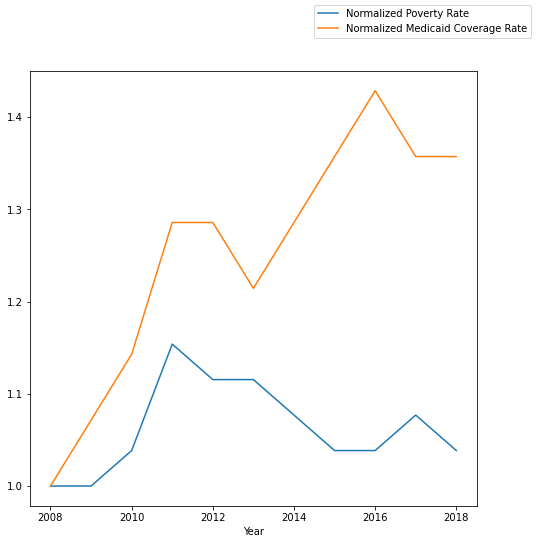

In [103]:
fig = plt.figure(figsize = (8,8))
sns.lineplot(x='Year',y='norm_pov',data=pov_caid)
sns.lineplot(x='Year',y='norm_caid',data=pov_caid)
plt.ylabel('')
fig.legend(labels=['Normalized Poverty Rate','Normalized Medicaid Coverage Rate'])
;

**MEDICARE:**

In [111]:
data.loc[data['age'] >= 65, 'medicare_eligible']= 1
data.loc[data['age'] < 65, 'medicare_eligible'] = 0

In [114]:
medicare = data.groupby('year').mean()['medicare_eligible'].reset_index().round(2)
medicare = medicare.rename(columns = {'year':'Year', 'medicare_eligible':'>=65 Population Share'})
eld_care = medicare.merge(health_cov_time[['Year','Medicare Coverage']], on ='Year',how='outer')
eld_care

,Year,>=65 Population Share,Medicare Coverage
0,2008,0.16,0.18
1,2009,0.16,0.18
2,2010,0.16,0.18
3,2011,0.17,0.19
4,2012,0.17,0.19
5,2013,0.17,0.19
6,2014,0.18,0.20
7,2015,0.19,0.21
8,2016,0.19,0.21
9,2017,0.19,0.21


In [116]:
eld_care['norm_65'] = eld_care['>=65 Population Share'] / eld_care.loc[eld_care['Year'] == 2008,'>=65 Population Share'][0]
eld_care['norm_care'] = eld_care['Medicare Coverage'] / eld_care.loc[eld_care['Year'] == 2008,'Medicare Coverage'][0]
eld_care

,Year,>=65 Population Share,Medicare Coverage,norm_65,norm_care
0,2008,0.16,0.18,1.0000,1.000000
1,2009,0.16,0.18,1.0000,1.000000
2,2010,0.16,0.18,1.0000,1.000000
3,2011,0.17,0.19,1.0625,1.055556
4,2012,0.17,0.19,1.0625,1.055556
5,2013,0.17,0.19,1.0625,1.055556
6,2014,0.18,0.20,1.1250,1.111111
7,2015,0.19,0.21,1.1875,1.166667
8,2016,0.19,0.21,1.1875,1.166667
9,2017,0.19,0.21,1.1875,1.166667


''

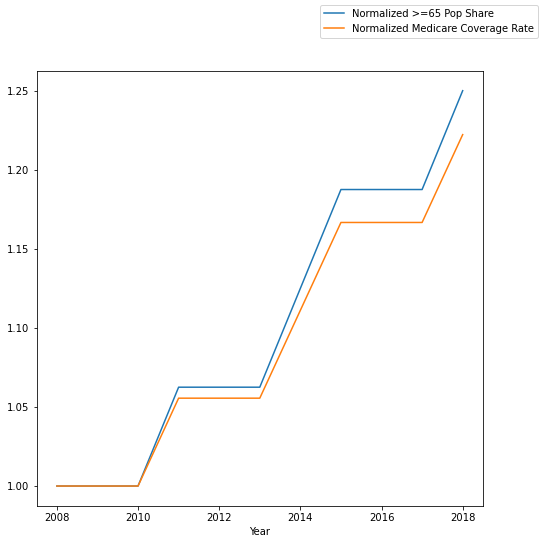

In [117]:
fig = plt.figure(figsize = (8,8))
sns.lineplot(x='Year',y='norm_65',data=eld_care)
sns.lineplot(x='Year',y='norm_care',data=eld_care)
plt.ylabel('')
fig.legend(labels=['Normalized >=65 Pop Share','Normalized Medicare Coverage Rate'])
;